<h3>Population Data<h3>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd

popdata = pd.read_csv(r"C:\Users\prabr\Desktop\GroupProjectWork\HumanPopulation\population-of-cities-towns-and-villages\population-of-cities-towns-and-villages.csv")


popdata.pop("Code")
popdata.columns = pd.Index(["Country","Year","VillagePop","TownPop","CityPop"])
popdata["TotalPop"] = popdata["VillagePop"]+popdata["TownPop"]+popdata["CityPop"]
popdata.head()

,Country,Year,VillagePop,TownPop,CityPop,TotalPop
0,Afghanistan,1975,4653196.0,4663051.5,2868921.2,12185168.7
1,Afghanistan,1980,4745344.5,4750704.0,3020798.2,12516846.7
2,Afghanistan,1985,4354585.0,3533504.5,2660250.0,10548339.5
3,Afghanistan,1990,4362137.5,3525674.2,2846176.0,10733987.7
4,Afghanistan,1995,5387096.5,6618796.0,4447504.0,16453396.5


Text(0.5, 1.0, 'Population over the years')

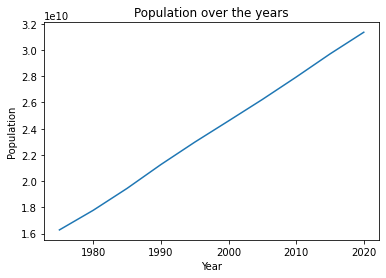

In [23]:
totalpop_year = popdata[["Year","TotalPop"]].groupby("Year").sum()
plt.plot(totalpop_year)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population over the years")

Text(0.5, 1.0, 'Population over the years')

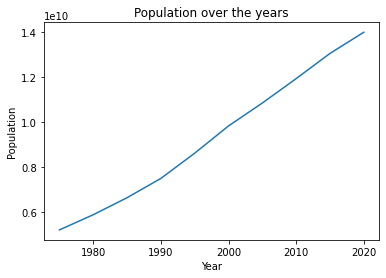

In [24]:
totalpop_year = popdata[["Year","CityPop"]].groupby("Year").sum()
plt.plot(totalpop_year)
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population over the years")

<h3>Wind Turbine Data<h3>

In [25]:
turbinedata = pd.read_excel(r"C:\Users\prabr\Desktop\GroupProjectWork\WindTurbines\Global-Wind-Power-Tracker-June-2024.xlsx",sheet_name="Data")
turbinedata = turbinedata[["Date Last Researched","Country/Area","Capacity (MW)","Installation Type",
"Status","Start year","Retired year","Latitude","Longitude","Location accuracy"]]
turbinedata.head()

,Date Last Researched,Country/Area,Capacity (MW),Installation Type,Status,Start year,Retired year,Latitude,Longitude,Location accuracy
0,2023/07/03,Algeria,10.0,Onshore,operating,2014.0,NaN,28.4624,-0.0576,exact
1,2023/07/03,Algeria,20.0,Onshore,cancelled - inferred 4 y,NaN,NaN,35.1689,7.1055,approximate
2,2023/07/03,Algeria,50.0,Unknown,cancelled - inferred 4 y,NaN,NaN,29.2356,0.4569,approximate
3,2023/07/06,Egypt,1100.0,Onshore,construction,2026.0,NaN,26.2540,29.2675,approximate
4,2023/07/06,Egypt,10000.0,Unknown,announced,NaN,NaN,26.5583,31.6773,approximate


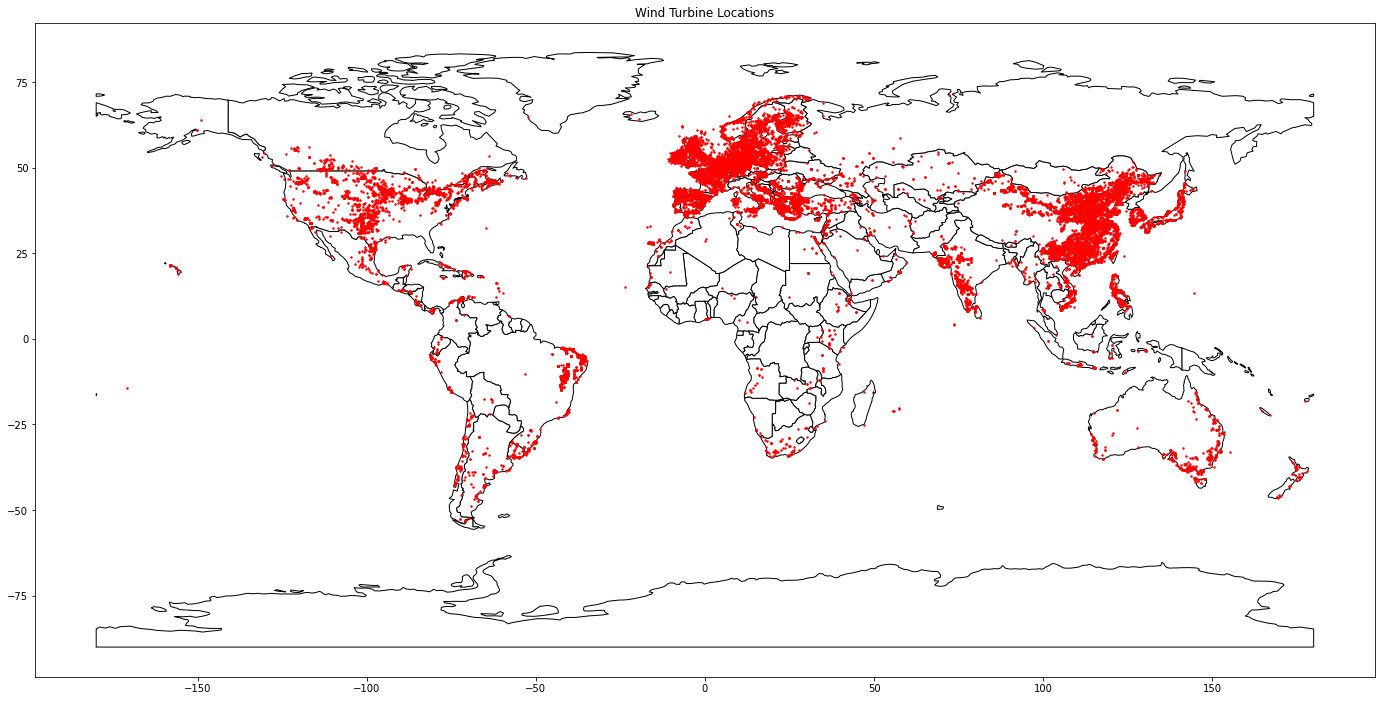

In [26]:

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)
ax = world.plot(color="white", edgecolor="black",figsize=(24,16))
gdf = gpd.GeoDataFrame(turbinedata,geometry=gpd.points_from_xy(turbinedata["Longitude"],turbinedata["Latitude"], crs="EPSG:4326"))
plt.title("Wind Turbine Locations")
gdf.plot(ax=ax,color="red",markersize=2)

plt.show()

<h3>Urban Landscape Data<h3>

In [27]:
from matplotlib import pyplot as plt
import pandas as pd
import netCDF4
fp=r'C:\Users\prabr\Desktop\GroupProjectWork\UrbanLand\urbanspatial-urban-land-backscatter-time-series-1993-2020-seasonal-land-netcdf\seasonal-land-netcdf\ascat_seasonal_land_sig0_mean.nc'
nc = netCDF4.Dataset(fp)
print(nc.variables.keys())
landdata = pd.DataFrame(nc.variables,index=range(nc.variables["lat"][:].size))


dict_keys(['lat', 'lon', 'spatial_ref', 'time', 'sig0'])


In [28]:
landdata["lat"].head()

0    [64.475, 64.425, 64.375, 64.325, 64.275, 64.22...
1    [64.475, 64.425, 64.375, 64.325, 64.275, 64.22...
2    [64.475, 64.425, 64.375, 64.325, 64.275, 64.22...
3    [64.475, 64.425, 64.375, 64.325, 64.275, 64.22...
4    [64.475, 64.425, 64.375, 64.325, 64.275, 64.22...
Name: lat, dtype: object

<h3>Aurora Data<h3>
<h6>Magnetic Field Tracking Concept<h6>

In [29]:
auroradata = pd.read_json(r"C:\Users\prabr\Desktop\GroupProjectWork\NaturalLightLevel\ovation_aurora_latest.json")


       Observation Time  Longitude  Latitude  Aurora
0  2025-01-31T10:34:00Z       -180       -90       6
1  2025-01-31T10:34:00Z       -180       -89       0
2  2025-01-31T10:34:00Z       -180       -88       8
3  2025-01-31T10:34:00Z       -180       -87       9
4  2025-01-31T10:34:00Z       -180       -86       9


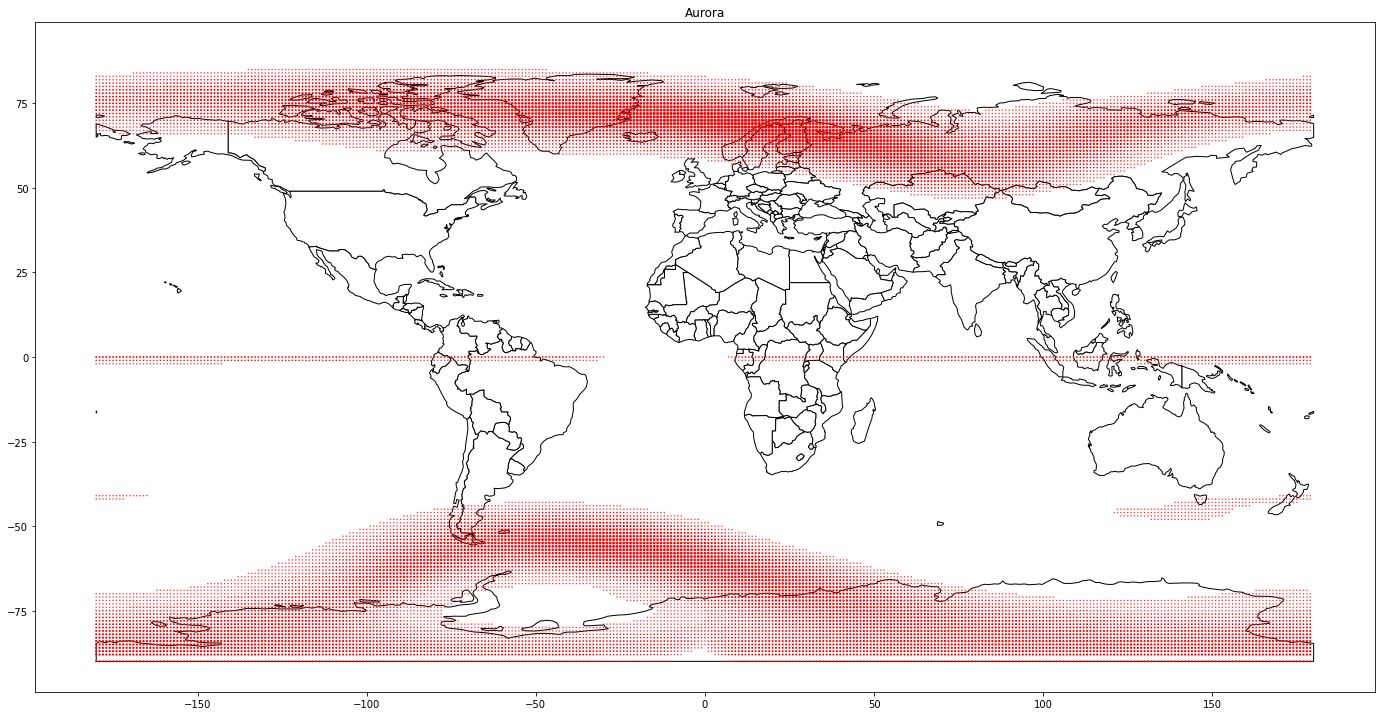

In [30]:
auroradata[["Longitude", "Latitude", "Aurora"]] = pd.DataFrame(auroradata["coordinates"].tolist())
auroradata["Longitude"]=auroradata["Longitude"]-180
print(auroradata[["Observation Time","Longitude","Latitude","Aurora"]].head())


url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)
ax = world.plot(color="white", edgecolor="black",figsize=(24,16))
gdf = gpd.GeoDataFrame(auroradata,geometry=gpd.points_from_xy(auroradata["Longitude"],auroradata["Latitude"], crs="EPSG:4326"))
plt.title("Aurora")
gdf.plot(ax=ax,color="red",markersize=auroradata["Aurora"]/6)

plt.show()

<h3>Deforestation Data<h3>
<h6>Still needs to be processed<h6>


In [31]:
from matplotlib import pyplot as plt
import pandas as pd
path=r'C:\Users\prabr\Desktop\GroupProjectWork\Deforestation\gfw_2023_statistics_summary_v30102024.xlsx'
forestdata = pd.read_excel(path,sheet_name="Country tree cover loss")

#Note: this dataset has a lot of data including carbon data etc so is not just limited to deforestation

In [32]:
forestdata.head()

,country,threshold,area_ha,extent_2000_ha,extent_2010_ha,gain_2000-2020_ha,tc_loss_ha_2001,tc_loss_ha_2002,tc_loss_ha_2003,tc_loss_ha_2004,...,tc_loss_ha_2014,tc_loss_ha_2015,tc_loss_ha_2016,tc_loss_ha_2017,tc_loss_ha_2018,tc_loss_ha_2019,tc_loss_ha_2020,tc_loss_ha_2021,tc_loss_ha_2022,tc_loss_ha_2023
0,Afghanistan,0,64385715,64385715,64385715,10741,103,214,267,225,...,9,0,0,0,32,26,46,47,15,133
1,Afghanistan,10,64385715,432115,126247,10741,92,190,253,207,...,4,0,0,0,28,19,40,37,9,32
2,Afghanistan,15,64385715,302660,106867,10741,91,186,247,205,...,3,0,0,0,28,18,39,32,8,22
3,Afghanistan,20,64385715,284357,105733,10741,89,180,245,203,...,3,0,0,0,28,18,39,32,8,22
4,Afghanistan,25,64385715,254867,72395,10741,89,180,245,202,...,3,0,0,0,27,18,38,28,7,20


<h3>Carbon Data<h3>
<h6>Still needs to be processed<h6>

In [33]:
from matplotlib import pyplot as plt
import pandas as pd
path=r'C:\Users\prabr\Desktop\GroupProjectWork\Deforestation\gfw_2023_statistics_summary_v30102024.xlsx'
carbondata = pd.read_excel(path,sheet_name="Country carbon data")


In [34]:
carbondata.head()

,country,umd_tree_cover_density_2000__threshold,umd_tree_cover_extent_2000__ha,gfw_aboveground_carbon_stocks_2000__Mg_C,avg_gfw_aboveground_carbon_stocks_2000__Mg_C_ha-1,gfw_forest_carbon_gross_emissions__Mg_CO2e_yr-1,gfw_forest_carbon_gross_removals__Mg_CO2_yr-1,gfw_forest_carbon_net_flux__Mg_CO2e_yr-1,gfw_forest_carbon_gross_emissions_2001__Mg_CO2e,gfw_forest_carbon_gross_emissions_2002__Mg_CO2e,...,gfw_forest_carbon_gross_emissions_2014__Mg_CO2e,gfw_forest_carbon_gross_emissions_2015__Mg_CO2e,gfw_forest_carbon_gross_emissions_2016__Mg_CO2e,gfw_forest_carbon_gross_emissions_2017__Mg_CO2e,gfw_forest_carbon_gross_emissions_2018__Mg_CO2e,gfw_forest_carbon_gross_emissions_2019__Mg_CO2e,gfw_forest_carbon_gross_emissions_2020__Mg_CO2e,gfw_forest_carbon_gross_emissions_2021__Mg_CO2e,gfw_forest_carbon_gross_emissions_2022__Mg_CO2e,gfw_forest_carbon_gross_emissions_2023__Mg_CO2e
0,Afghanistan,0,64385715,25912558,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,10,432115,21758845,50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,15,302660,16568110,55,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,20,284357,15782996,56,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,25,254867,14538150,57,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h3>Flight Data<h3>

In [35]:
from matplotlib import pyplot as plt
import pandas as pd
path=r'C:\Users\prabr\Desktop\GroupProjectWork\AirTraffic\API_IS.AIR.PSGR_DS2_en_csv_v2_20.csv'
planedata = pd.read_csv(path)
planedata = planedata.drop(["1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","Indicator Name","2022","2023"],axis=1)

In [36]:
planedata.head()

,Country Name,Country Code,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,223502.00,274280.00,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,IS.AIR.PSGR,3418300.0,3775300.0,4074500.0,4808000.0,5126100.0,5333100.0,6040400.0,...,3.583868e+07,35112457.82,36350758.95,39154692.0,41553429.0,45423814.08,52613964.08,5.485142e+07,1.916604e+07,2.405759e+07
2,Afghanistan,AFG,IS.AIR.PSGR,84700.0,97400.0,104900.0,96600.0,96100.0,99000.0,101700.0,...,1.737962e+06,2044188.00,2209428.00,1929907.0,1917924.0,1647425.00,1125367.00,1.066747e+06,4.490410e+05,2.932130e+05
3,Africa Western and Central,AFW,IS.AIR.PSGR,1167000.0,1238100.0,1285700.0,1453300.0,1685700.0,1987500.0,2540000.0,...,9.570162e+06,8677884.00,8030237.17,8696300.0,8129874.0,8837017.00,12337766.28,1.138491e+07,5.328945e+06,7.425487e+06
4,Angola,AGO,IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,155400.0,...,1.132424e+06,1321872.00,1409952.00,1244491.0,1482546.0,1375523.00,1516628.00,1.436959e+06,3.566950e+05,3.114880e+05


<BarContainer object of 52 artists>

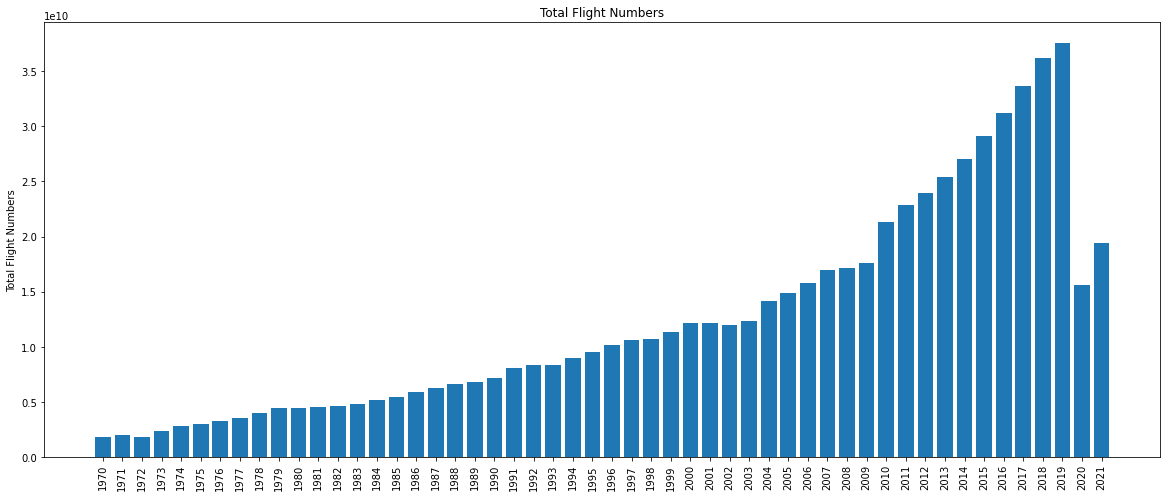

In [37]:
totalflightnumbers = planedata.loc[:,"1970":].sum(axis=0)
plt.figure(figsize=(20,8))
plt.title("Total Flight Numbers")
plt.ylabel("Total Flight Numbers")
plt.xticks(rotation=90)
plt.bar(x=totalflightnumbers.index,height=totalflightnumbers)


<BarContainer object of 33 artists>

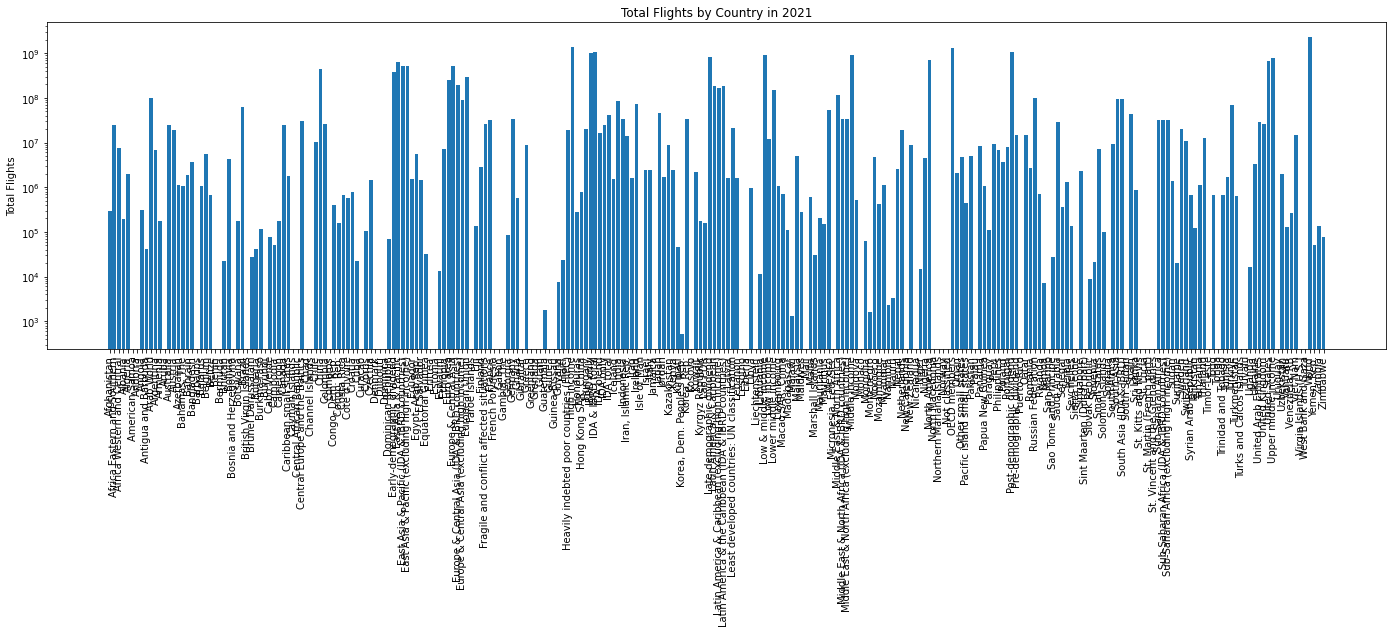

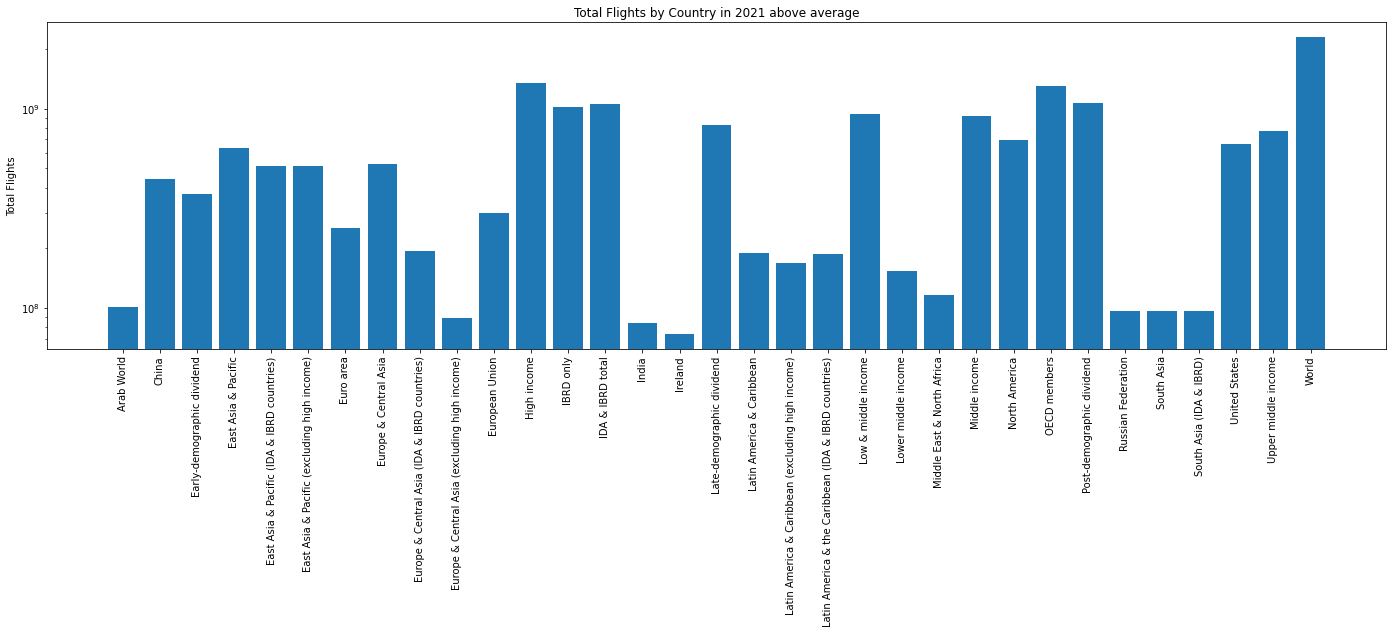

In [38]:
planedata_2021_country=planedata.groupby("Country Name")["2021"].sum()
plt.figure(figsize=(24,6))
plt.yscale("log")
plt.title("Total Flights by Country in 2021")
plt.xticks(rotation=90)
plt.ylabel("Total Flights")
plt.bar(planedata_2021_country.index,planedata_2021_country)

plt.figure(figsize=(24,6))
plt.yscale("log")
plt.title("Total Flights by Country in 2021 above average")
plt.xticks(rotation=90)
plt.ylabel("Total Flights")
planedata_2021_country_above_avg = planedata_2021_country[planedata_2021_country>planedata_2021_country.mean()]
plt.bar(planedata_2021_country_above_avg.index,planedata_2021_country_above_avg) #too many countries

<BarContainer object of 52 artists>

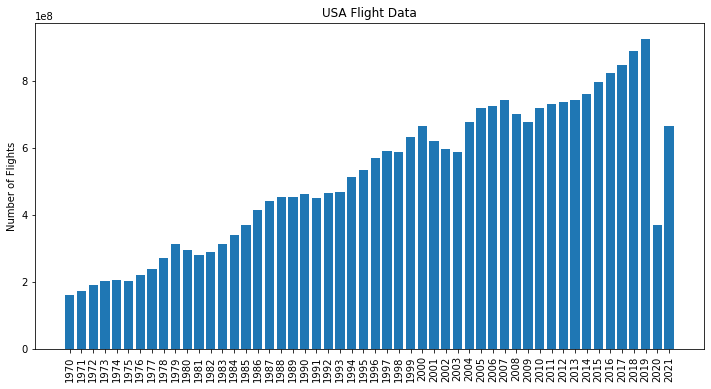

In [39]:
usaflightdata = planedata[planedata["Country Name"]=="United States"].loc[:,"1970":].T
usaflightdata.columns = ["Flights"]
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("USA Flight Data")
plt.ylabel("Number of Flights")
plt.bar(x=usaflightdata.index,height=usaflightdata["Flights"])


<h3>Noise Data<h3>
<h6>Only in France at 49°32'33.44",0°5'57.927" lat long near Le Havre<h6> 

keys:
name,type,crs,features

crs-->type,properties
    properties-->name - {'name': 'EPSG:3950'}

features == list
features-->type,geometry,properties
    geometry-->type,coordinates
    properties-->OBJECTID,DB,SHAPE.LEN

In [62]:
"""
from matplotlib import pyplot as plt
import pandas as pd
import json
noisedata = json.load(open(r"C:\Users\prabr\Desktop\GroupProjectWork\NoiseData\OD.CARTE_BRUIT_AERIEN_LDEN.json"))
#noisedata = pd.read_json(r"C:\Users\prabr\Desktop\GroupProjectWork\NoiseData\OD.CARTE_BRUIT_AERIEN_LDEN.json")
print("DB values: ", [noisedata["features"][i]["properties"]["DB"] for i in range(4)])
dbdata = {}
for i in range(4):
    dbdata[noisedata["features"][i]["properties"]["DB"]]=noisedata["features"][i]["geometry"]["coordinates"]
dbdata.keys()
"""

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 101-102: truncated \UXXXXXXXX escape (2484251436.py, line 12)

In [56]:
"""noisedata["features"][3]["geometry"]["coordinates"]"""

'noisedata["features"][3]["geometry"]["coordinates"]'

In [55]:
"""import numpy as np
for i in dbdata.keys():
    #plt.figure()
    #plt.title(f"{i} DB")
    plt.scatter(np.array(dbdata[i])[:,0],np.array(dbdata[i])[:,1])
plt.title("Noise Isophone Distribution throughout the day?")
plt.legend(dbdata.keys())

for i in dbdata.keys():
    plt.figure()
    plt.title(f"{i} DB")
    plt.scatter(np.array(dbdata[i])[:,0],np.array(dbdata[i])[:,1])
plt.legend(dbdata.keys())"""

'import numpy as np\nfor i in dbdata.keys():\n    #plt.figure()\n    #plt.title(f"{i} DB")\n    plt.scatter(np.array(dbdata[i])[:,0],np.array(dbdata[i])[:,1])\nplt.title("Noise Isophone Distribution throughout the day?")\nplt.legend(dbdata.keys())\n\nfor i in dbdata.keys():\n    plt.figure()\n    plt.title(f"{i} DB")\n    plt.scatter(np.array(dbdata[i])[:,0],np.array(dbdata[i])[:,1])\nplt.legend(dbdata.keys())'